In [31]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
regTest= pd.read_csv("regressionTest.csv")
regTrain = pd.read_csv("regressionTrain.csv")

In [33]:
regTrain.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [34]:
regTrain.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


In [35]:
regTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [36]:
regTrain.shape

(453, 15)

In [37]:
# Data values of the dataset regTrain

regTrain.values

array([[1, 'My Happiness', 'Connie Francis', ..., 75, 3, 44],
       [2, 'Unchained Melody', 'The Teddy Bears', ..., 49, 3, 37],
       [3, 'How Deep Is Your Love', 'Bee Gees', ..., 11, 3, 77],
       ...,
       [451, 'Dilemma', 'Nelly', ..., 23, 14, 77],
       [452, "It's Gonna Be Me", '*NSYNC', ..., 5, 8, 62],
       [453, 'In The Army Now', 'Status Quo', ..., 11, 2, 59]],
      dtype=object)

### Data Correlation

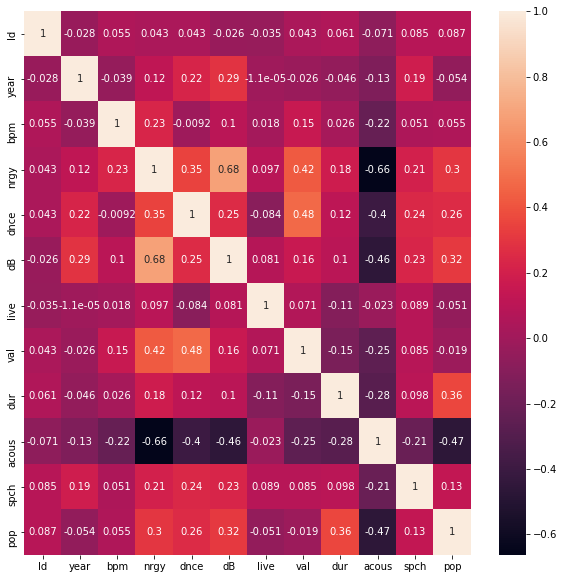

In [38]:
plt.figure(figsize=(10,10))
data = regTrain.corr()
sns.heatmap(data, annot=True)
plt.show()

### Plotting histograms of the attributes to know more about the distribution of data

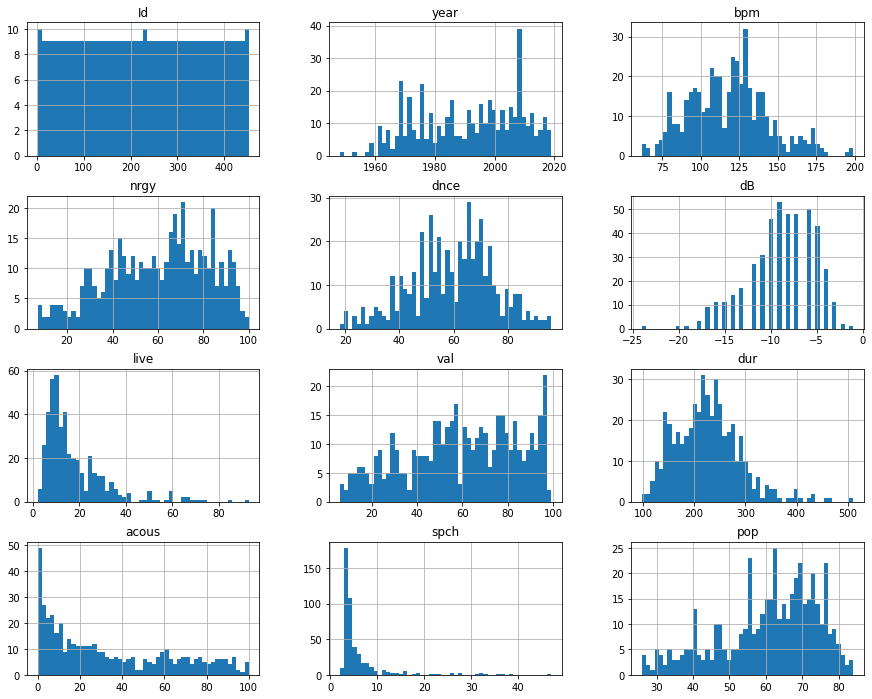

In [39]:
regTrain.hist(bins=50, figsize=(15,12))
plt.show()

In [40]:
df = pd.DataFrame(regTrain)
df

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,449,But Not For Me,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,450,Surf City,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,451,Dilemma,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,452,It's Gonna Be Me,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62


### Checking for null values in the dataset

In [41]:
df.isnull().sum()

Id            0
title         0
artist        0
top genre    15
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

### Checking for the unique values in dataset

In [42]:
regTrain.nunique()

Id           453
title        451
artist       345
top genre     86
year          64
bpm          107
nrgy          90
dnce          77
dB            21
live          58
val           94
dur          202
acous         95
spch          29
pop           59
dtype: int64

### Dropping the rows and columns having null values as well as the columns having more unique data values

In [43]:
# Dropping the columns id and title which have more unique values

regTrain = df.drop(['Id','title'], axis=1)

# Dropping the rows and columns having null values

regTrain = regTrain.dropna()
regTrain

,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
2,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63
5,Bruno Mars,pop,2010,110,56,71,-7,12,23,223,15,6,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,Ella Fitzgerald,adult standards,1959,80,22,18,-17,10,16,214,92,4,45
449,Jan & Dean,brill building pop,2010,148,81,53,-13,23,96,147,50,3,50
450,Nelly,dance pop,2002,168,55,73,-8,20,61,289,23,14,77
451,*NSYNC,boy band,2000,165,87,64,-5,6,88,191,5,8,62


### Segment the target data and the features

In [44]:
X = regTrain.values[:,0:12]  # features
y = regTrain.values[:,12]   # target data

In [45]:
X

array([['Connie Francis', 'adult standards', 1996, ..., 150, 75, 3],
       ['Bee Gees', 'adult standards', 1979, ..., 245, 11, 3],
       ['Barbra Streisand', 'adult standards', 1980, ..., 232, 25, 3],
       ...,
       ['Nelly', 'dance pop', 2002, ..., 289, 23, 14],
       ['*NSYNC', 'boy band', 2000, ..., 191, 5, 8],
       ['Status Quo', 'album rock', 2002, ..., 281, 11, 2]], dtype=object)

In [46]:
y

array([44, 77, 67, 63, 74, 44, 71, 35, 63, 68, 30, 35, 60, 40, 46, 65, 62,
       77, 74, 71, 64, 63, 42, 59, 55, 48, 74, 78, 73, 61, 71, 78, 30, 66,
       40, 70, 63, 57, 74, 60, 67, 60, 61, 60, 76, 71, 78, 53, 60, 59, 61,
       68, 37, 70, 30, 70, 68, 67, 56, 77, 52, 66, 72, 69, 48, 39, 79, 70,
       79, 49, 75, 73, 61, 49, 38, 65, 42, 38, 68, 42, 59, 67, 70, 30, 54,
       73, 60, 70, 43, 80, 53, 56, 72, 67, 55, 69, 54, 44, 46, 46, 71, 47,
       73, 58, 71, 58, 56, 59, 58, 77, 41, 77, 68, 62, 39, 66, 70, 67, 62,
       52, 66, 43, 58, 70, 63, 49, 70, 75, 61, 39, 55, 65, 72, 67, 56, 41,
       73, 51, 41, 48, 53, 76, 71, 58, 66, 44, 59, 71, 71, 47, 65, 38, 60,
       72, 73, 70, 82, 56, 63, 62, 69, 68, 61, 76, 53, 75, 77, 56, 48, 54,
       62, 62, 73, 65, 68, 46, 79, 61, 57, 61, 77, 60, 63, 63, 72, 48, 32,
       56, 73, 36, 77, 78, 65, 73, 73, 62, 60, 60, 79, 67, 72, 56, 76, 66,
       55, 57, 66, 64, 64, 33, 58, 68, 37, 38, 71, 41, 58, 49, 55, 54, 65,
       66, 81, 80, 31, 70

### Encoding the categorical data into numerical data

In [47]:
# Encode the categorical data into numerical data

from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder()

regTrain_encoded = le.fit_transform(X)
regTrain_encoded

array([[ 54.,   1.,  40., ...,  24.,  72.,   1.],
       [ 19.,   1.,  23., ..., 112.,  11.,   1.],
       [ 18.,   1.,  24., ...,  99.,  25.,   1.],
       ...,
       [199.,  51.,  46., ..., 150.,  23.,  12.],
       [  0.,  24.,  44., ...,  61.,   5.,   6.],
       [243.,   4.,  46., ..., 143.,  11.,   0.]])

In [48]:
# Scale the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
regTrain_scaled = sc.fit_transform(regTrain_encoded)
regTrain_scaled

array([[-1.13131115, -1.21126427,  0.3061392 , ..., -1.38430764,
         1.47496676, -0.5553838 ],
       [-1.4966423 , -1.21126427, -0.71836079, ...,  0.39656595,
        -0.72574592, -0.5553838 ],
       [-1.50708033, -1.21126427, -0.65809608, ...,  0.13348235,
        -0.22066432, -0.5553838 ],
       ...,
       [ 0.38220358,  0.70845548,  0.66772743, ...,  1.16557955,
        -0.29281883,  1.96899276],
       [-1.69496492, -0.32819318,  0.54719802, ..., -0.63553124,
        -0.94220946,  0.59206009],
       [ 0.84147702, -1.09608108,  0.66772743, ...,  1.02391915,
        -0.72574592, -0.78487258]])

In [49]:
regTrain.shape

(438, 13)

## Building model

In [50]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(regTrain_scaled,y,test_size=0.2)

In [51]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (350, 12)
X_test: (88, 12)
y_train: (350,)
y_test: (88,)


### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error


model1 = LinearRegression()
model1.fit(X_train,y_train)
predictions = model1.predict(X_test)
predictionTrain = predictions.astype(int)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)

print("Root mean square error:",rmse)
print("Mean absolute error:",mean_absolute_error(y_test,predictions))
print("Mean absolute percentage error", mean_absolute_percentage_error(y_test,predictions))
print("R2 score:",r2_score(y_test,predictions))


Root mean square error: 10.191619499428825
Mean absolute error: 8.227824002854861
Mean absolute percentage error 0.1571166013387718
R2 score: 0.3541701312068354


### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor(max_depth=3)
model2.fit(X_train,y_train)
predictions = model2.predict(X_test)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)

print("Root mean square error:",rmse)
print("Mean absolute error:",mean_absolute_error(y_test,predictions))
print("Mean absolute percentage error", mean_absolute_percentage_error(y_test,predictions))
print("R2 score:",r2_score(y_test,predictions))

Root mean square error: 11.149444631142122
Mean absolute error: 8.486841033894647
Mean absolute percentage error 0.16634776011359212
R2 score: 0.22707350466288834


### Support vector machine for regression

In [54]:
from sklearn.svm import SVR

model3 = SVR()
model3.fit(X_train,y_train)
predictions = model3.predict(X_test)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)

print("Root mean square error:",rmse)
print("Mean absolute error:",mean_absolute_error(y_test,predictions))
print("Mean absolute percentage error", mean_absolute_percentage_error(y_test,predictions))
print("R2 score:",r2_score(y_test,predictions))

Root mean square error: 11.05261700140518
Mean absolute error: 8.689774136507014
Mean absolute percentage error 0.17841366325117047
R2 score: 0.24044020861377702


### Model predictions on the test dataset  regTest

In [55]:
df = pd.DataFrame(regTest)
df

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3
2,456,We Are The Champions - Remastered 2011,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3
3,457,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4
4,458,This Eve of Parting,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,563,Candy Shop,50 Cent,east coast hip hop,2005,125,57,61,-8,38,76,209,3,47
110,564,Dragostea Din Tei - Italian Version,O-Zone,bubblegum dance,2010,130,89,67,-6,10,80,215,4,3
111,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27
112,566,YMCA - Original Version 1978,Village People,disco,1978,127,97,72,-5,12,73,287,6,14


In [56]:
df.shape

(114, 14)

In [57]:
# Checking for null values in the dataset

print(df.isnull().sum())

# Checking for unique values

regTest.nunique()

Id           0
title        0
artist       0
top genre    1
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
dtype: int64


Id           114
title        114
artist       101
top genre     39
year          54
bpm           67
nrgy          56
dnce          51
dB            18
live          44
val           66
dur           86
acous         52
spch          20
dtype: int64

In [58]:
# Dropping the rows and columns having null values

regTest_update = df.dropna()

# Dropping the columns id and title which have more unique values

regTest_unique = regTest_update.drop(['Id','title'], axis=1)
regTest_unique


,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18
1,Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3
2,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3
3,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4
4,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...
109,50 Cent,east coast hip hop,2005,125,57,61,-8,38,76,209,3,47
110,O-Zone,bubblegum dance,2010,130,89,67,-6,10,80,215,4,3
111,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27
112,Village People,disco,1978,127,97,72,-5,12,73,287,6,14


In [59]:
# Encode the categorical data into numerical data

from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder()

regTest_encoded = le.fit_transform(regTest_unique)
regTest_encoded

array([[82., 20., 40., ..., 35.,  1., 13.],
       [34., 31., 30., ..., 71., 19.,  0.],
       [68., 31., 15., ..., 18., 25.,  0.],
       ...,
       [90., 26., 30., ..., 55., 27., 17.],
       [96., 24., 16., ..., 68.,  6.,  9.],
       [13., 30., 24., ..., 52.,  8.,  0.]])

In [60]:
# Scale the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
regTest_scaled = sc.fit_transform(regTest_encoded)
regTest_scaled

array([[ 1.15766319,  0.47663258,  0.87224484, ..., -0.22075136,
        -1.14592201,  2.35771752],
       [-0.51366104,  1.38114296,  0.16264321, ...,  1.33291048,
        -0.01829484, -0.6050601 ],
       [ 0.67019362,  1.38114296, -0.90175925, ..., -0.95442501,
         0.35758089, -0.6050601 ],
       ...,
       [ 1.43621723,  0.97000188,  0.16264321, ...,  0.6423941 ,
         0.4828728 ,  3.2693414 ],
       [ 1.64513276,  0.80554544, -0.83079908, ...,  1.20343866,
        -0.83269224,  1.44609364],
       [-1.24486539,  1.29891474, -0.26311777, ...,  0.51292228,
        -0.70740033, -0.6050601 ]])

### Predictions by Linear regression model on regTest dataset

In [61]:
predictionsTest = model1.predict(regTest_scaled)

In [63]:
predicted_value = predictionsTest.astype(int)

In [65]:
# Adding new column of predicted popularity to the regTest dataset

regTest_update['Predicted Popularity'] = list(predicted_value)
regTest_update

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,Predicted Popularity
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18,64
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3,61
2,456,We Are The Champions - Remastered 2011,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3,62
3,457,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4,61
4,458,This Eve of Parting,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,563,Candy Shop,50 Cent,east coast hip hop,2005,125,57,61,-8,38,76,209,3,47,65
110,564,Dragostea Din Tei - Italian Version,O-Zone,bubblegum dance,2010,130,89,67,-6,10,80,215,4,3,61
111,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27,65
112,566,YMCA - Original Version 1978,Village People,disco,1978,127,97,72,-5,12,73,287,6,14,71


### Predictions by Decision Tree model on regTest dataset

In [66]:
predictionsTest = model2.predict(regTest_scaled)

In [67]:
predicted_value = predictionsTest.astype(int)

array([66, 66, 55, 66, 48, 66, 66, 45, 57, 66, 66, 66, 45, 66, 66, 57, 55,
       66, 66, 66, 55, 55, 55, 55, 48, 66, 66, 48, 34, 66, 66, 55, 66, 66,
       66, 66, 66, 66, 66, 66, 66, 66, 66, 55, 66, 66, 66, 66, 66, 66, 48,
       66, 66, 45, 66, 55, 66, 55, 66, 55, 66, 66, 66, 66, 66, 66, 66, 66,
       48, 66, 66, 48, 66, 66, 66, 66, 66, 66, 55, 66, 66, 45, 66, 55, 48,
       66, 66, 34, 66, 34, 66, 66, 66, 66, 66, 57, 66, 66, 48, 48, 66, 66,
       45, 34, 66, 66, 66, 66, 66, 66, 66, 66, 66])

In [68]:
# Adding new column of predicted popularity to the regTest dataset

regTest_update['Predicted Popularity'] = list(predicted_value)
regTest_update

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,Predicted Popularity
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18,66
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3,66
2,456,We Are The Champions - Remastered 2011,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3,55
3,457,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4,66
4,458,This Eve of Parting,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,563,Candy Shop,50 Cent,east coast hip hop,2005,125,57,61,-8,38,76,209,3,47,66
110,564,Dragostea Din Tei - Italian Version,O-Zone,bubblegum dance,2010,130,89,67,-6,10,80,215,4,3,66
111,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27,66
112,566,YMCA - Original Version 1978,Village People,disco,1978,127,97,72,-5,12,73,287,6,14,66


### Predictions by Support vector machine for regression on regTest Dataset

In [69]:
predictionsTest = model3.predict(regTest_scaled)

In [70]:
predicted_value = predictionsTest.astype(int)

In [71]:
# Adding new column of predicted popularity to the regTest dataset

regTest_update['Predicted Popularity'] = list(predicted_value)
regTest_update

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,Predicted Popularity
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18,63
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3,66
2,456,We Are The Champions - Remastered 2011,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3,62
3,457,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4,64
4,458,This Eve of Parting,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,563,Candy Shop,50 Cent,east coast hip hop,2005,125,57,61,-8,38,76,209,3,47,64
110,564,Dragostea Din Tei - Italian Version,O-Zone,bubblegum dance,2010,130,89,67,-6,10,80,215,4,3,64
111,565,Big Poppa - 2005 Remaster,The Notorious B.I.G.,east coast hip hop,1994,84,58,78,-7,14,76,253,43,27,66
112,566,YMCA - Original Version 1978,Village People,disco,1978,127,97,72,-5,12,73,287,6,14,65
